<a href="https://colab.research.google.com/github/yasuhiroinoue/AppMathSci/blob/main/%E5%BF%9C%E7%94%A8%E6%95%B0%E7%90%86(2021_11_08).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**応用数理科学(第6回)**##

前半の講義では、微分方程式を用いた決定論的な数理モデルを扱った。後半の講義では、「ゆらぎ」があるときの数理モデルを考えていこう。そのための準備として、モデル評価の基準を解説する。

###**モデル評価の基準**###
観測データは、様々な原因で誤差を含む。いっそのこと、観測値とは、ある確率分布に従う確率変数の実現値と考えることにしよう。この真の確率分布を近似する確率分布（モデル）を求めたとき、それがどの程度“良いのか”をどのような視点で評価すれば良いか？

##**Kullback-Leibler Divergence (カルバック・ライブラー ダイバージェンス)**##
Kullback-Leiblerダイバージェンス(以後、KLダイバージェンス)$D_{KL}(p||q)$は、一方の確率分布$q$が他方の確率分布$p$からどれほど異なるかを表す量である。
$$D_{KL}(p||q)=\sum_ip_i\log\frac{p_i}{q_i}$$
$D_{KL}(p||q)$は非負値を取ることを次のように証明できる。
$x>0$に対して、$\log x \leq x - 1$であるから
$$D_{KL}(p||q)=\sum_ip_i\log\frac{p_i}{q_i}=-\sum_ip_i\log\frac{q_i}{p_i} \geq -\sum_ip_i(\frac{q_i}{p_i}-1)=0$$
となる。等号成立は、$p_i=q_i$に限られる。このように非負値であるが、距離の公理は満たさないので、決して、カルバック・ライブラー「距離」と**呼んではいけない**。

###**対数尤度**###
いま、$p$を真の分布、$q$をモデル分布としよう。
$D_{KL}(p||q)\geq 0$より
$$\sum_i p_i\log p_i \geq \sum_i p_i \log q_i$$となる。
両辺ともに、真の分布$p$による期待値計算の形をしているので、
$$E[\log p] \geq E[\log q] \tag{1}$$
と書こう。$E[\cdot]$は真の分布$p$による期待値である。

ここで、$l(q) = \sum_i \log q_i$を対数尤度といい、$E[\log q]$を**平均対数尤度**という。

この不等式から、平均対数尤度の上限値は、$E[\log p]$である。
したがって、平均対数尤度が大きければ大きいほど、モデル分布$q$は真の分布に近いことを表す。

$n$個の観測データが得られたときの対数尤度の$1/n$倍は、$n\rightarrow \infty$で$$\frac{1}{n}\sum_{j=1}^n\log{q(x_j)}=\sum_i \frac{n_i}{n}\log{q_i}\rightarrow E[\log q]$$となる。（大数の法則）

極限を取る前の等式において、左辺から右辺に式変形するときに、事象$x_j$の和から状態$i$の和に変えているので、良く見ること。
（例：サイコロを振る実験で、データindex=1でサイコロの目=3、index=2でサイコロの目=4のように記録順で和を取るのが左辺、サイコロの目=1は$n_1$回でしたと和を取るのが右辺）

###**例題**###
A君とB君は、阪神 対 巨人における阪神の勝率を予想した。A君は、2割だという。B君は、4割だという。

阪神の勝率の真値が3割とすると、A君とB君のどちらの予想がより正しいと言えるのか？

対数尤度で考えなさい。

###**例題解答**###


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

p = 0.3
q_A = 0.2
q_B = 0.4
l_A = p*np.log(q_A)+(1-p)*np.log(1-q_A)
l_B = p*np.log(q_B)+(1-p)*np.log(1-q_B)

if l_A > l_B:
  print('A君')
elif l_A < l_B:
  print('B君')
else:
  print('どっちもどっち')

B君


###**演習**###

阪神の勝率の真値は誰にも分からないので、実際のデータをもとに考えよう。2020年においては、阪神 対 巨人は阪神8勝、巨人16勝であった。A君とB君のどちらの予想のほうが正しかったと言えそうか。
（参考データ[NPB](https://npb.jp/bis/2020/stats/std_c.html)）


In [ ]:
##ここに演習解答しなさい##

##***最尤法***##
式(1)は、対数尤度が大きければ大きいほど、モデル分布は真の分布に近づくことを表していた。そこで、対数尤度を最大化すると、真の分布に近似的にもっとも近い分布が得られそうだ。

いま、確率変数$(X_1, X_2, \cdots, X_n)$の同時確率密度関数が$f(x_1,\cdots,x_n|\theta)$で与えられているとする。$\theta$は同時確率密度関数のパラメータである（平均値や分散）。観測データ($x_1,\cdots,x_n$)は与えられたものとして固定し、$f$を$\theta$の関数と考えるのが尤度$L(\theta|\{x_i\})$である。
$$L(\theta|\{x_i\})=f(x_1,\cdots,x_n|\theta)$$
確率変数が独立の場合は、各密度関数の掛算となるので
$$L(\theta|\{x_i\})=\prod_i f(x_i|\theta)$$
上式の対数を取ると、すでに求めた対数尤度の式が再び得られる。
$$\log L(\theta|\{x_i\})=\sum_i\log f(x_i|\theta)\tag{2}$$

最尤法は、対数尤度を最大化するようにパラメータ$\theta$を決める手法で、以下の尤度方程式の解として、最尤推定値$\hat \theta$を決定する。
$$\frac{\partial \log L}{\partial \theta}=0$$


###**例（2項分布）**###
コインが1枚あり、10回なげたところ、(表, 表, 裏, 表, 表, 裏, 裏, 表, 表, 表）と出た。コインの表が出る確率$\theta$とする。尤度$L$は
$$L(\theta)=\theta^7(1-\theta)^3$$
であるから
$$\frac{\partial \log L}{\partial \theta}=\frac{7}{\theta}+\frac{3}{1-\theta}=0$$より、$$\hat \theta = 7/10$$ですね。

###**例（正規分布）**###
$$f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2\pi \sigma^2}}\exp{(-\frac{(x-\mu)^2}{2\sigma^2})}$$
$$\log L = -\frac{n}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}\sum_{i=1}^n(x_i-\mu)^2\tag{3}$$
となる。尤度方程式より
$$\frac{\partial \log L}{\partial \mu} =\frac{1}{\sigma^2}\sum_i(x_i-\mu)=0$$
$$\frac{\partial \log L}{\partial \sigma^2} =-\frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum_i(x_i-\mu)^2=0$$
となるので
$$\hat\mu=\frac{1}{n}\sum_{i=1}^nx_i$$
$$\hat \sigma^2 = \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2$$
が得られる。

なお、ここから最小二乗法と呼ばれる手法との関係が見えてくる。式(3)の右辺第2項目は二乗誤差となっているので、最小二乗法は、誤差分布が正規分布と仮定したときの最尤法と見なすことができる。逆に言えば、誤差分布が正規分布でないものに、最小二乗法を適用した場合には、得られたモデルの使い方には注意しよう。



###**演習**###
[NPB](https://npb.jp/bis/2020/stats/std_c.html)のデータを用いて、球団の勝利・敗北・引分の確率を最尤法で推定しなさい。




###**未知データに対するモデルの当てはまりの良さ**##
真の分布から生成される標本をある時点で得て、これに対して最尤モデルを作ったとする。この最尤モデルが、将来に得られるデータに対して、どれほど良いモデルとなっているのか？（予測・説明可能か）

その良さの評価（モデル選択の基準）として、最尤モデルの平均対数尤度を考えよう。これは、最尤モデルを作った時点よりあとに得られるだろうデータも含めて評価することに相当する。

実は、最尤モデルを作ったときに得られる最大対数尤度の期待値をとっても、平均対数尤度とは一致しない。

最大対数尤度は、得られたデータに対して、最大化しているので、まだ得られていないデータも含む平均対数尤度より、値が大きく出やすい。この傾向（偏り）は、モデルのパラメータ数に比例する。

実際に、真の分布が正規分布だと分かっている状況で、最尤法を行い、最大対数尤度と平均対数尤度の関係を見てみよう。

###**数値実験（最大対数尤度と平均対数尤度）**###
次のコードを動かし、最大対数尤度と平均対数尤度の差(バイアス)を、モデルのパラメータの数（次数）に対してプロットしてみよう。

#####**前提**#####
生成されるデータの確率密度関数は正規分布であるとすると
例（正規分布）の性質から、最小二乗法を使って、最尤推定が行える。
$n$個のデータ点$(x_i, y_i)$において、$x$は確定値のデータセットで、確率変数$Y$が値$y$を取るとしよう。このとき、$Y$の確率密度関数は、平均$\mu=\mu(x|\theta^*)$, 分散$\sigma^2$の正規分布とする。


#####**アルゴリズムの概略**#####
最初に得られたデータを用いて、最小二乗法により、多項式$y=\mu_n(x|\theta)$における最尤推定量$\hat \theta$を求め、最大対数尤度の計算を行う。
次に、$Y$の真の確率分布から新たにsample個のデータを生成して、これらを用いて、平均対数尤度を計算する。

以上の操作をsys_sample人の試験者が独立に行い、
sys_sample個の最大対数尤度と平均対数尤度から、それぞれ平均を求める。
$\rightarrow$最大対数尤度の期待値、平均対数尤度の期待値

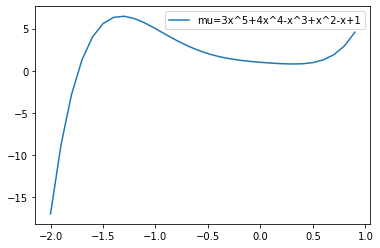

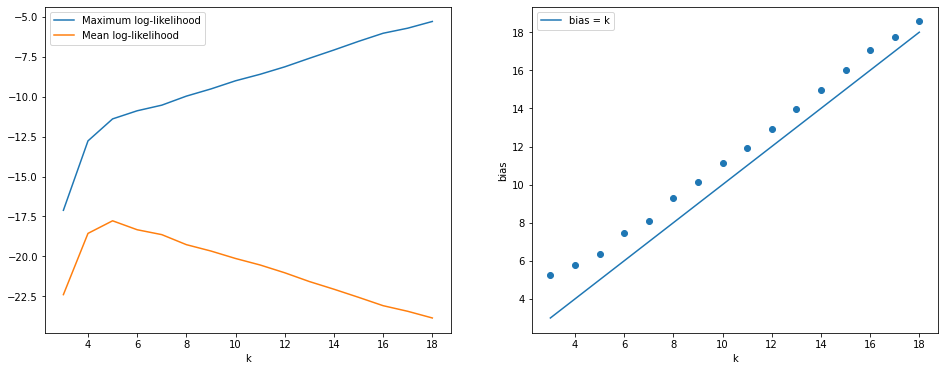

In [ ]:
##このコードの実行には8分50秒ほどかかる
## sys_sample, sampleの数を増やせば増やすほど、真の確率分布での期待値に近づく

## 分散は既知とする
import numpy as np
from matplotlib import pyplot as plt

### 真の分布の準備 ###
## Standard Deviation = sigma ##
sigma=3

## バイアス評価のための配列: インデックスは次数 ##
k_size = 16
bias = np.zeros(k_size)
l_star = np.zeros(k_size)
l_ensb = np.zeros(k_size)

## 平均値の関数 ##
#y = 3x**5 + 4x**4 - x**3 + x**2 - x + 1
p=np.poly1d( np.array([3, 4, -1, 1, -1, 1]) )
x=np.arange(-2,1,0.1)
plt.plot(x,p(x), label="mu=3x^5+4x^4-x^3+x^2-x+1")
plt.legend()

# 最大対数尤度の平均を求めるサンプル数
sys_sample = 50

for item in range(0,sys_sample):

  ## 初回のフィッティング用のデータ生成 ##
  ## モデル選択の意味から、次数kに対して共通にしておく 
  y=np.zeros(x.shape[0])
  i=0
  ## 正規分布 ##
  for xi in x:
    y[i]=np.random.normal(p(xi),sigma,1)
    i+=1

  ## 平均対数尤度の計算のためのサンプル数 ##
  sample = 500

  ## 次数 ##
  ## k_ini <= k < k_ini+k_size
  k_ini = 3
  for k in range(k_ini,k_ini+k_size):
    ## 最大対数尤度 ##
    l_max_k = 0.0

    ## 平均対数尤度 ##
    l_mean = 0.0

    ## n=0 (初回のフィッティング結果の最尤値を求める)
    ## フィッティング ##
    a=np.polyfit(x, y, k)
    q=np.poly1d(a)

    ## 最大対数尤度 計算 ##
    l_max = 0.0
    i=0
    for xi in x:
      l_max -= (y[i]-q(xi))**2/(2.0*sigma**2)#-n/2*log(2pi*sigma**2)は平均対数尤度との差を取るときに消えるので最初から計算しません。
      i+=1

    l_max_k = l_max

    for n in range(0,sample):
      ## フィッティング用のデータ生成 ##
      z=np.zeros(x.shape[0])
      i=0
      for xi in x:
        z[i]=np.random.normal(p(xi),sigma,1)
        i+=1
      
    #  plt.scatter(x,z)
      ## 平均対数尤度 計算 ##
      l_max = 0.0
      i=0
      for xi in x:
        l_max -= (z[i]-q(xi))**2/(2.0*sigma**2)
        i+=1
      l_mean += l_max

    l_mean /= sample

    l_star[k-k_ini] += l_max_k
    l_ensb[k-k_ini] += l_mean
    bias[k-k_ini] +=(l_max_k - l_mean)
  
for k in range(0,k_size):
  l_star[k] /= sys_sample
  l_ensb[k] /= sys_sample
  bias[k] /= sys_sample

## 図の描画 ##
k=np.arange(k_ini,k_ini+k_size)
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel("k")
ax1.plot(k,l_star, label="Maximum log-likelihood")
ax1.plot(k,l_ensb, label="Mean log-likelihood")
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlabel("k")
ax2.set_ylabel("bias")
ax2.scatter(k,bias)
ax2.plot(k,k,label="bias = k")
ax2.legend()
fig.show()


###**数値実験の結果**###
数値実験の結果から、
$$(最尤モデルの平均対数尤度)=(最大対数尤度)-(モデルの自由パラメータの数)\tag{4}$$
となりそうだ。

平均対数尤度の期待値は、今あるデータで得られる最大対数尤度の期待値と一致しない。
モデルのパラメータの数を上げると、最大対数尤度は増加するが、平均対数尤度の期待値は必ずしも増加しない。

平均対数尤度は、無限個の将来に得られるデータも含めての尤度であるから、良いモデルの選択は、平均対数尤度で評価しなければならない。
今回の場合、平均対数尤度は、$k=5$でピークを持つ。パラメータの数は5個が良いということだ。真の確率分布に設定した$\mu$の次数とも一致する。もし、最大対数尤度でモデル選択をするのなら$k=18$を選んでしまうかもしれない。

しかし、問題は、本来、平均対数尤度を知りえないのである。
なぜなら、真の確率分布を知らないからだ。

では、どうすれば良いのか？

数値実験の結果を整理した関係式(4)は、最大対数尤度からモデル次数を引くことで、モデルの平均対数尤度の期待値が得られることを示している。

この関係式を使えば、モデルの良さを評価できそうだ。

次回、この関係式の理論的な背景を解説し、モデル選択の評価指標の1つである赤池情報量基準(AIC)を理解する。